<a href="https://colab.research.google.com/github/GreatLearningAIML1/gurgaon-feb-batch-abhishek02git/blob/master/R7_InternalLab_Questions_FMNIST_Simple_CNN_CIFAR_DATA_Augment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [0]:
import numpy
import time
import keras

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [5]:
X_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)
#num_classes = y_test.shape[1]

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
# Will reshape the data in Model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

### Import the necessary layers from keras to build the model

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import Callback

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [13]:
# Create the model
model1 = Sequential()
model1.add(Conv2D(32,(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
model1.add(Conv2D(33,(3,3),padding='same',activation='relu'))

model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dense(10,activation='softmax'))

W0728 10:06:44.148784 140369916417920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 10:06:44.189766 140369916417920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 10:06:44.198187 140369916417920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [14]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

W0728 10:06:46.005420 140369916417920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 10:06:46.032574 140369916417920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 33)        9537      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25872)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3311744   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 3,322,891
Trainable params: 3,322,891
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
epochs = 10

In [16]:
start = time.clock() 
model1.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=epochs, batch_size=32,callbacks=[es])
end = time.clock()
print("Train Time: {} ".format(end-start)) 

W0728 10:06:51.089404 140369916417920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 10:06:51.148888 140369916417920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.3559 - acc: 0.8720 - val_loss: 0.2883 - val_acc: 0.8897
Epoch 2/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.2181 - acc: 0.9204 - val_loss: 0.2504 - val_acc: 0.9069
Epoch 3/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.1534 - acc: 0.9435 - val_loss: 0.2457 - val_acc: 0.9169
Epoch 4/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.1044 - acc: 0.9613 - val_loss: 0.2759 - val_acc: 0.9156
Epoch 5/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0686 - acc: 0.9745 - val_loss: 0.3082 - val_acc: 0.9171
Epoch 6/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0460 - acc: 0.9839 - val_loss: 0.3529 - val_acc: 0.9108
Epoch 7/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0308 - acc: 0.9893 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [26]:
# Create the model
model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
model2.add(Conv2D(33,(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(rate=0.25))

model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(10,activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 33)        9537      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25872)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3311744   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 3,322,891
Trainable params: 3,322,891
Non-trainable params: 0
_________________________________________________________________
None


### Now, to the above model, lets add Data Augmentation 

In [27]:
start = time.clock() 
model2.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=epochs, batch_size=32,callbacks=[es])
end = time.clock()
print("Train Time: {} ".format(end-start)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.4090 - acc: 0.8534 - val_loss: 0.2900 - val_acc: 0.8936
Epoch 2/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.2684 - acc: 0.9026 - val_loss: 0.2425 - val_acc: 0.9104
Epoch 3/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.2235 - acc: 0.9162 - val_loss: 0.2382 - val_acc: 0.9140
Epoch 4/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.1926 - acc: 0.9274 - val_loss: 0.2307 - val_acc: 0.9180
Epoch 5/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.1679 - acc: 0.9374 - val_loss: 0.2130 - val_acc: 0.9234
Epoch 6/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.1498 - acc: 0.9435 - val_loss: 0.2390 - val_acc: 0.9169
Epoch 7/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.1323 - acc: 0.9503 - val_loss: 0.

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True)

datagen.fit(X_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

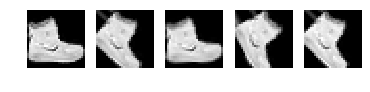

In [42]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [47]:
model2.fit_generator(datagen.flow(X_train,y_train_cat,batch_size=10),nb_epoch=10, samples_per_epoch = X_train.shape[0],validation_data=(X_test, y_test_cat))

Epoch 1/10
  17/6000 [..............................] - ETA: 51s - loss: 11.5573 - acc: 0.1941

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=6000, epochs=10)`
  """Entry point for launching an IPython kernel.


6000/6000 [==============================] - 44s 7ms/step - loss: 1.1698 - acc: 0.6140 - val_loss: 2.6342 - val_acc: 0.3221
Epoch 2/10
6000/6000 [==============================] - 44s 7ms/step - loss: 0.7377 - acc: 0.7343 - val_loss: 2.4628 - val_acc: 0.3306
Epoch 3/10
6000/6000 [==============================] - 44s 7ms/step - loss: 0.6359 - acc: 0.7730 - val_loss: 2.2678 - val_acc: 0.3254
Epoch 4/10
6000/6000 [==============================] - 43s 7ms/step - loss: 0.5783 - acc: 0.7923 - val_loss: 2.4363 - val_acc: 0.3652
Epoch 5/10
6000/6000 [==============================] - 43s 7ms/step - loss: 0.5403 - acc: 0.8052 - val_loss: 2.7644 - val_acc: 0.3007
Epoch 6/10
6000/6000 [==============================] - 44s 7ms/step - loss: 0.5207 - acc: 0.8139 - val_loss: 2.4146 - val_acc: 0.2917
Epoch 7/10
6000/6000 [==============================] - 44s 7ms/step - loss: 0.4950 - acc: 0.8231 - val_loss: 2.5523 - val_acc: 0.3198
Epoch 8/10
6000/6000 [==============================] - 43s 7ms/st

###  Report the final train and validation accuracy

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

### **Prepare/fit the generator.**

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**